# Analysis

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\anshu\Desktop\MLOps\Flight-MLOps-Project\Flight-MLOps-Project\data\processed\processed_raw_data.csv')
df = df[(df['Days_to_Fly']>1)]
df = df[(df['flight_duration_value'] > 4.4)]
df = df[(df['flight_duration_value'] < 12)]
df = df[~(df['carrier'].isin(['Third Party', 'Frontier', 'Sun Country Airlines']))]
df = df[df['price']<1000]
df

,Unnamed: 0,carrier,Trip_Type,Airport_Route,stop,round_trip_duration,Days_to_Fly,from_hour,flight_duration_value,Holiday,Fly_WeekDay,price
0,0,Spirit,Rounds Trip,EWR - LAX,Nonstop,89,18,06:45,6.5,Not_Holiday,4,211.0
1,1,Alaska,Rounds Trip,EWR - LAX,Nonstop,89,18,07:30,6.3,Not_Holiday,4,297.0
2,2,JetBlue,Rounds Trip,EWR - LAX,Nonstop,89,18,05:15,6.2,Not_Holiday,4,298.0
3,3,United,Rounds Trip,EWR - LAX,Nonstop,89,18,12:00,6.4,Not_Holiday,4,302.0
7,7,United,Rounds Trip,EWR - LAX,Nonstop,89,18,07:00,6.2,Not_Holiday,4,309.0
...,...,...,...,...,...,...,...,...,...,...,...,...
138978,140441,Alaska,One Way,LAX - EWR,Nonstop,0,89,10:15,5.6,Holiday,4,259.0
138979,140442,JetBlue,One Way,LAX - EWR,Nonstop,0,89,11:15,5.5,Holiday,4,259.0
138980,140443,Delta,One Way,LAX - JFK,Nonstop,0,89,06:00,5.6,Holiday,4,274.0
138981,140444,Delta,One Way,LAX - JFK,Nonstop,0,89,09:15,5.9,Holiday,4,274.0


In [3]:
df.loc[df['Airport_Route'].str.startswith('LAX -'),'From_City'] = 'Los Angeles'
df.loc[df['Airport_Route'].str.startswith('LAX -'),'To_City'] = 'New York'
df.loc[~df['Airport_Route'].str.startswith('LAX -'),'From_City'] = 'New York'
df.loc[~df['Airport_Route'].str.startswith('LAX -'),'To_City'] = 'Los Angeles'
df['City_Route'] = df['From_City'] + ' - ' + df['To_City']
df.head()

,Unnamed: 0,carrier,Trip_Type,Airport_Route,stop,round_trip_duration,Days_to_Fly,from_hour,flight_duration_value,Holiday,Fly_WeekDay,price,From_City,To_City,City_Route
0,0,Spirit,Rounds Trip,EWR - LAX,Nonstop,89,18,06:45,6.5,Not_Holiday,4,211.0,New York,Los Angeles,New York - Los Angeles
1,1,Alaska,Rounds Trip,EWR - LAX,Nonstop,89,18,07:30,6.3,Not_Holiday,4,297.0,New York,Los Angeles,New York - Los Angeles
2,2,JetBlue,Rounds Trip,EWR - LAX,Nonstop,89,18,05:15,6.2,Not_Holiday,4,298.0,New York,Los Angeles,New York - Los Angeles
3,3,United,Rounds Trip,EWR - LAX,Nonstop,89,18,12:00,6.4,Not_Holiday,4,302.0,New York,Los Angeles,New York - Los Angeles
7,7,United,Rounds Trip,EWR - LAX,Nonstop,89,18,07:00,6.2,Not_Holiday,4,309.0,New York,Los Angeles,New York - Los Angeles


In [4]:
df.sort_values(['flight_duration_value'])

,Unnamed: 0,carrier,Trip_Type,Airport_Route,stop,round_trip_duration,Days_to_Fly,from_hour,flight_duration_value,Holiday,Fly_WeekDay,price,From_City,To_City,City_Route
49272,49461,Spirit,One Way,EWR - LAX,1 stop,0,61,22:15,4.7,Not_Holiday,7,277.0,New York,Los Angeles,New York - Los Angeles
49984,50178,Spirit,One Way,EWR - LAX,1 stop,0,75,22:15,4.7,Not_Holiday,7,288.0,New York,Los Angeles,New York - Los Angeles
76157,76698,United,One Way,LAX - EWR,Nonstop,0,5,23:30,4.9,Not_Holiday,6,476.0,Los Angeles,New York,Los Angeles - New York
58734,59036,United,Rounds Trip,LAX - EWR,Nonstop,15,8,23:30,4.9,Not_Holiday,6,621.0,Los Angeles,New York,Los Angeles - New York
58732,59034,United,Rounds Trip,LAX - EWR,Nonstop,15,8,13:00,4.9,Not_Holiday,6,621.0,Los Angeles,New York,Los Angeles - New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96162,96805,JetBlue,One Way,LGA - LAX,1 stop,0,76,13:45,11.9,Not_Holiday,4,125.0,New York,Los Angeles,New York - Los Angeles
39586,39658,Spirit,One Way,LGA - LAX,1 stop,0,66,13:00,11.9,Not_Holiday,3,98.0,New York,Los Angeles,New York - Los Angeles
39899,39992,Spirit,One Way,LGA - LAX,1 stop,0,65,13:00,11.9,Not_Holiday,2,95.0,New York,Los Angeles,New York - Los Angeles
39984,40077,Spirit,One Way,LGA - LAX,1 stop,0,58,13:00,11.9,Not_Holiday,2,95.0,New York,Los Angeles,New York - Los Angeles


In [5]:
df = df[~((df['stop']=='1 stop') & (df['flight_duration_value']==4.7))].sort_values('flight_duration_value')
df

,Unnamed: 0,carrier,Trip_Type,Airport_Route,stop,round_trip_duration,Days_to_Fly,from_hour,flight_duration_value,Holiday,Fly_WeekDay,price,From_City,To_City,City_Route
68327,68745,United,Rounds Trip,LAX - EWR,Nonstop,56,4,14:45,4.9,Not_Holiday,4,470.0,Los Angeles,New York,Los Angeles - New York
24998,25007,United,One Way,LAX - EWR,Nonstop,0,12,14:45,4.9,Not_Holiday,2,230.0,Los Angeles,New York,Los Angeles - New York
4216,4216,United,One Way,LAX - EWR,Nonstop,0,13,14:45,4.9,Not_Holiday,6,469.0,Los Angeles,New York,Los Angeles - New York
2234,2234,United,Rounds Trip,LAX - EWR,Nonstop,4,7,14:45,4.9,Not_Holiday,7,913.0,Los Angeles,New York,Los Angeles - New York
14869,14872,United,One Way,LAX - EWR,Nonstop,0,6,14:45,4.9,Not_Holiday,1,430.0,Los Angeles,New York,Los Angeles - New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96162,96805,JetBlue,One Way,LGA - LAX,1 stop,0,76,13:45,11.9,Not_Holiday,4,125.0,New York,Los Angeles,New York - Los Angeles
39586,39658,Spirit,One Way,LGA - LAX,1 stop,0,66,13:00,11.9,Not_Holiday,3,98.0,New York,Los Angeles,New York - Los Angeles
39899,39992,Spirit,One Way,LGA - LAX,1 stop,0,65,13:00,11.9,Not_Holiday,2,95.0,New York,Los Angeles,New York - Los Angeles
39984,40077,Spirit,One Way,LGA - LAX,1 stop,0,58,13:00,11.9,Not_Holiday,2,95.0,New York,Los Angeles,New York - Los Angeles


# Minimum Flight Duration

C:\Users\anshu\AppData\Local\Temp\ipykernel_7928\1179098950.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\anshu\AppData\Local\Temp\ipykernel_7928\1179098950.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bx.set_xticklabels(bx.get_xticklabels(), rotation=90)


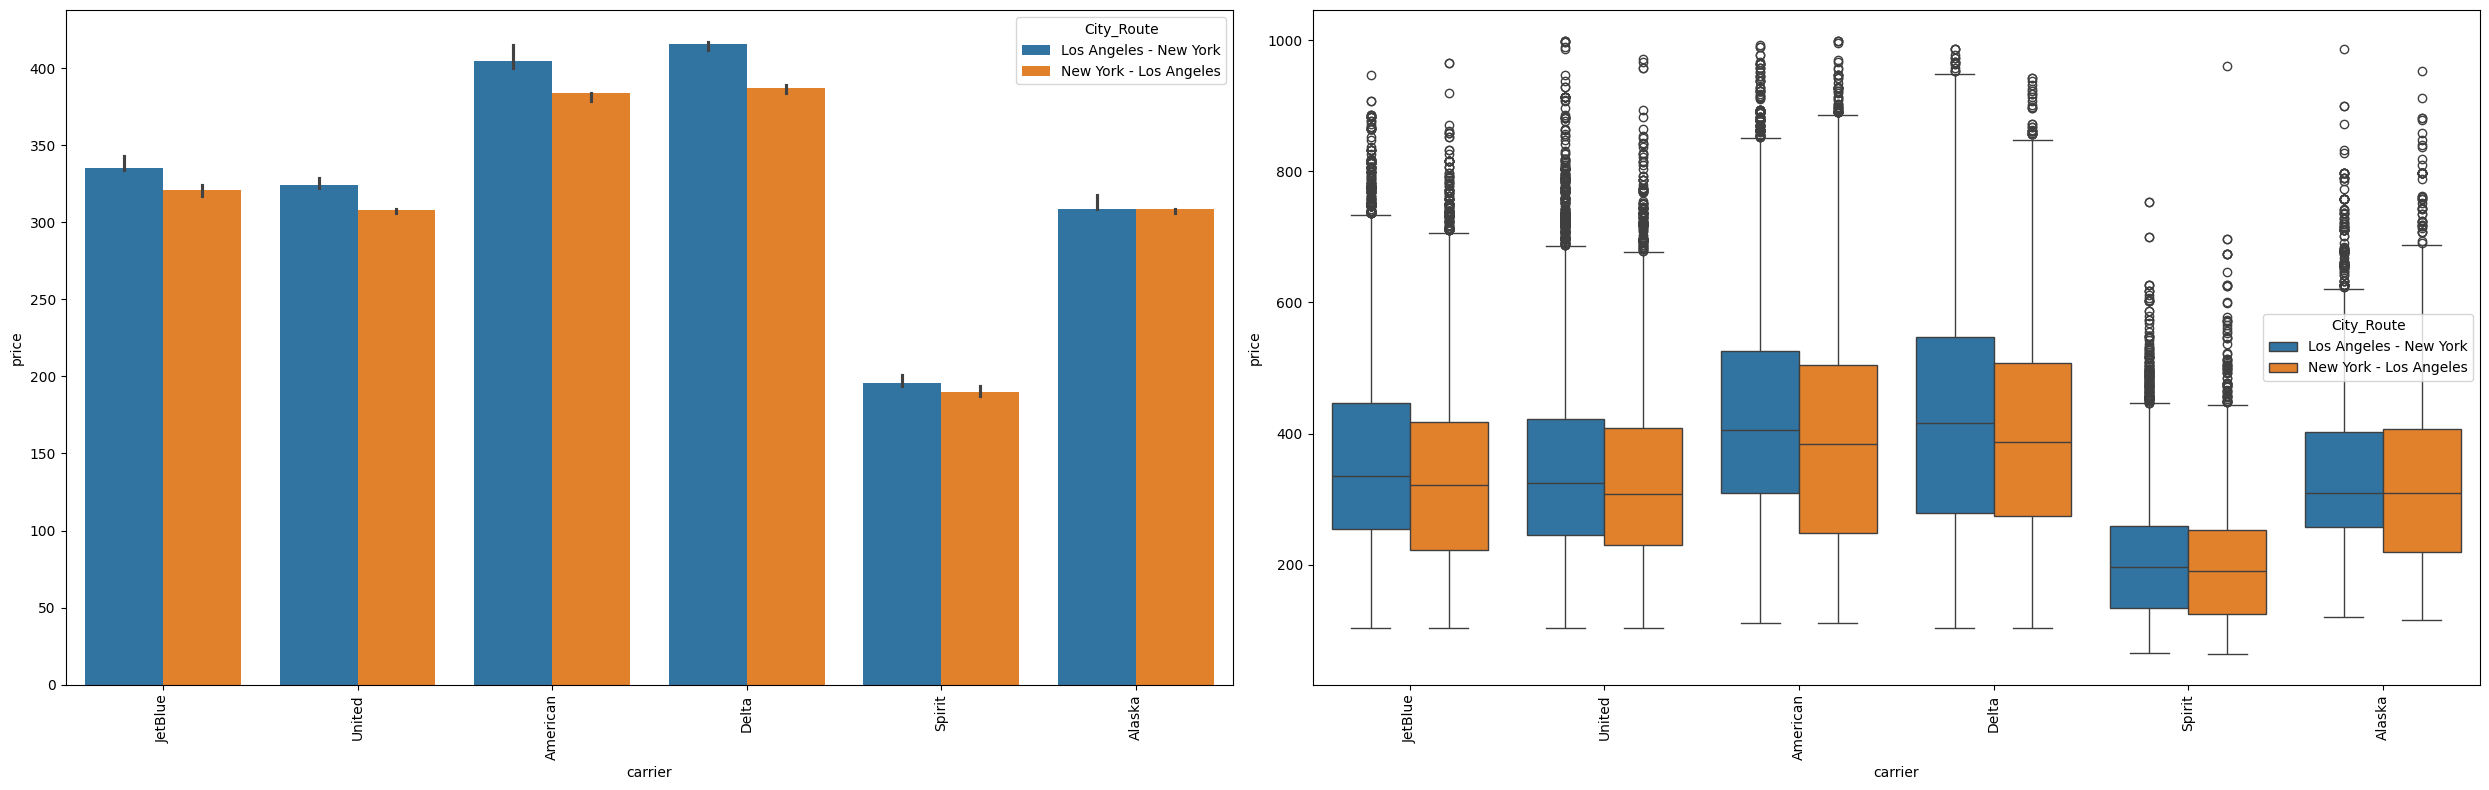

In [6]:
plt.figure(figsize=(25, 8))

plt.subplot(1,2,1)
carrier_counts = df['carrier'].value_counts()
ordered_carriers = carrier_counts.index

ax = sns.barplot(x=df['carrier'], y=df['price'], hue=df['City_Route'], order=ordered_carriers, estimator=np.median)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# plt.show()

plt.subplot(1,2,2)
bx = sns.boxplot(x=df['carrier'], y=df['price'], hue=df['City_Route'],order=ordered_carriers)
bx.set_xticklabels(bx.get_xticklabels(), rotation=90)
plt.tight_layout()
# plt.savefig(r'C:\Users\anshu\Desktop\MLOps\Flight-MLOps-Project\Flight-MLOps-Project\src\visualization\analytics_plots\price_by_carrier.png') 

C:\Users\anshu\AppData\Local\Temp\ipykernel_7928\3228450135.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='Airport_Route', y='flight_duration_value', data=min_flight_duration_LA, palette='viridis')
C:\Users\anshu\AppData\Local\Temp\ipykernel_7928\3228450135.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels())
C:\Users\anshu\AppData\Local\Temp\ipykernel_7928\3228450135.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Airport_Route', y='flight_duration_value', data=min_flight_duration_NY, palette='viridis')
C:\Users\anshu\AppData\Local\Tem

<Figure size 2500x800 with 0 Axes>

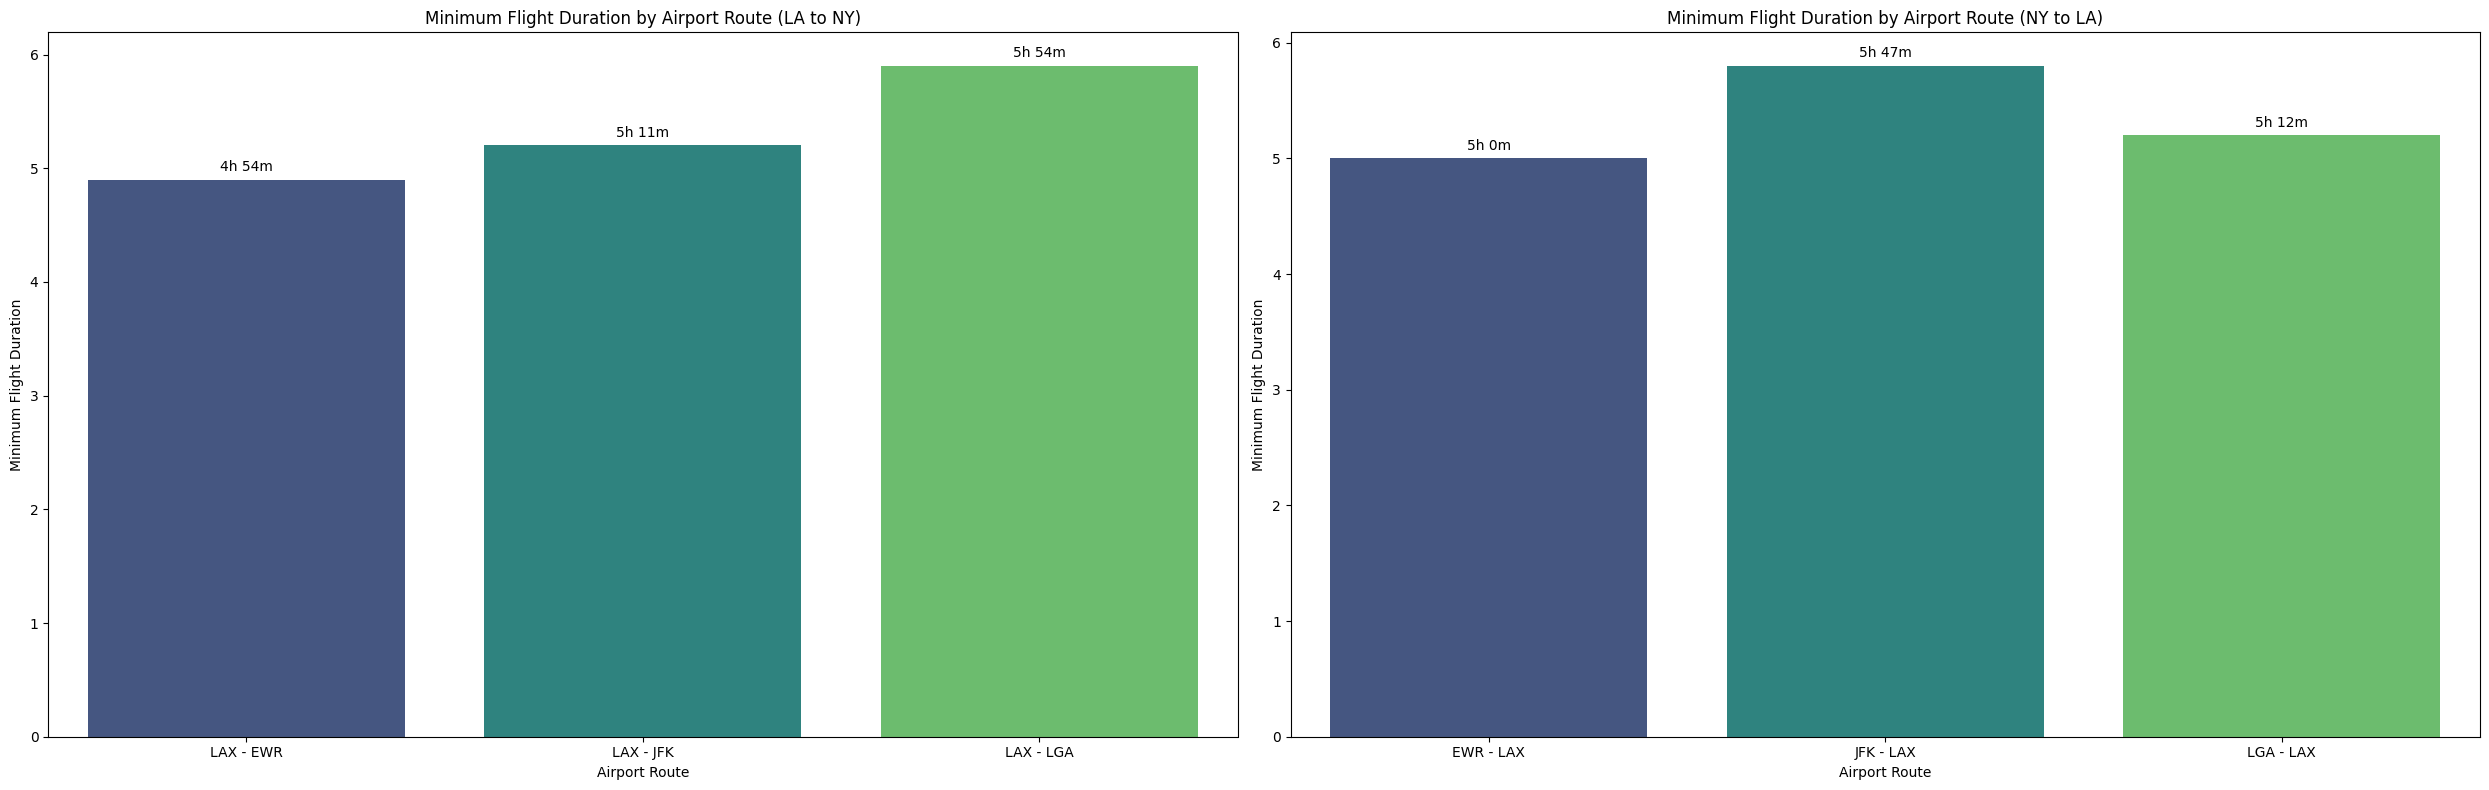

In [16]:
plt.figure(figsize=(25, 8))

def format_duration(duration):
    hours = int(duration)
    minutes = int((duration - hours) * 60)
    return f'{hours}h {minutes}m'

plt.figure(figsize=(25, 8))

# Subplot 1
plt.subplot(1, 2, 1)
min_flight_duration_LA = df[df['From_City'] == 'Los Angeles'].groupby('Airport_Route')['flight_duration_value'].min().reset_index()
ax1 = sns.barplot(x='Airport_Route', y='flight_duration_value', data=min_flight_duration_LA, palette='viridis')
ax1.set_xticklabels(ax1.get_xticklabels())
plt.title('Minimum Flight Duration by Airport Route (LA to NY)')
plt.xlabel('Airport Route')
plt.ylabel('Minimum Flight Duration')

# Add data labels
for p in ax1.patches:
    duration_label = format_duration(p.get_height())
    ax1.annotate(duration_label,
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0, 9),
                 textcoords = 'offset points')

# Subplot 2
plt.subplot(1, 2, 2)
min_flight_duration_NY = df[df['From_City'] == 'New York'].groupby('Airport_Route')['flight_duration_value'].min().reset_index()
ax2 = sns.barplot(x='Airport_Route', y='flight_duration_value', data=min_flight_duration_NY, palette='viridis')
ax2.set_xticklabels(ax2.get_xticklabels())
plt.title('Minimum Flight Duration by Airport Route (NY to LA)')
plt.xlabel('Airport Route')
plt.ylabel('Minimum Flight Duration')

# Add data labels
for p in ax2.patches:
    duration_label = format_duration(p.get_height())
    ax2.annotate(duration_label,
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0, 9),
                 textcoords = 'offset points')

plt.tight_layout()

# Save the plot
plt.savefig(r'C:\Users\anshu\Desktop\MLOps\Flight-MLOps-Project\Flight-MLOps-Project\src\visualization\analytics_plots\min_flight_duration.png')

# Show the plot
plt.show()

# Price vs Days_to_Fly vs Trip_Type

C:\Users\anshu\AppData\Local\Temp\ipykernel_23912\1890332708.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


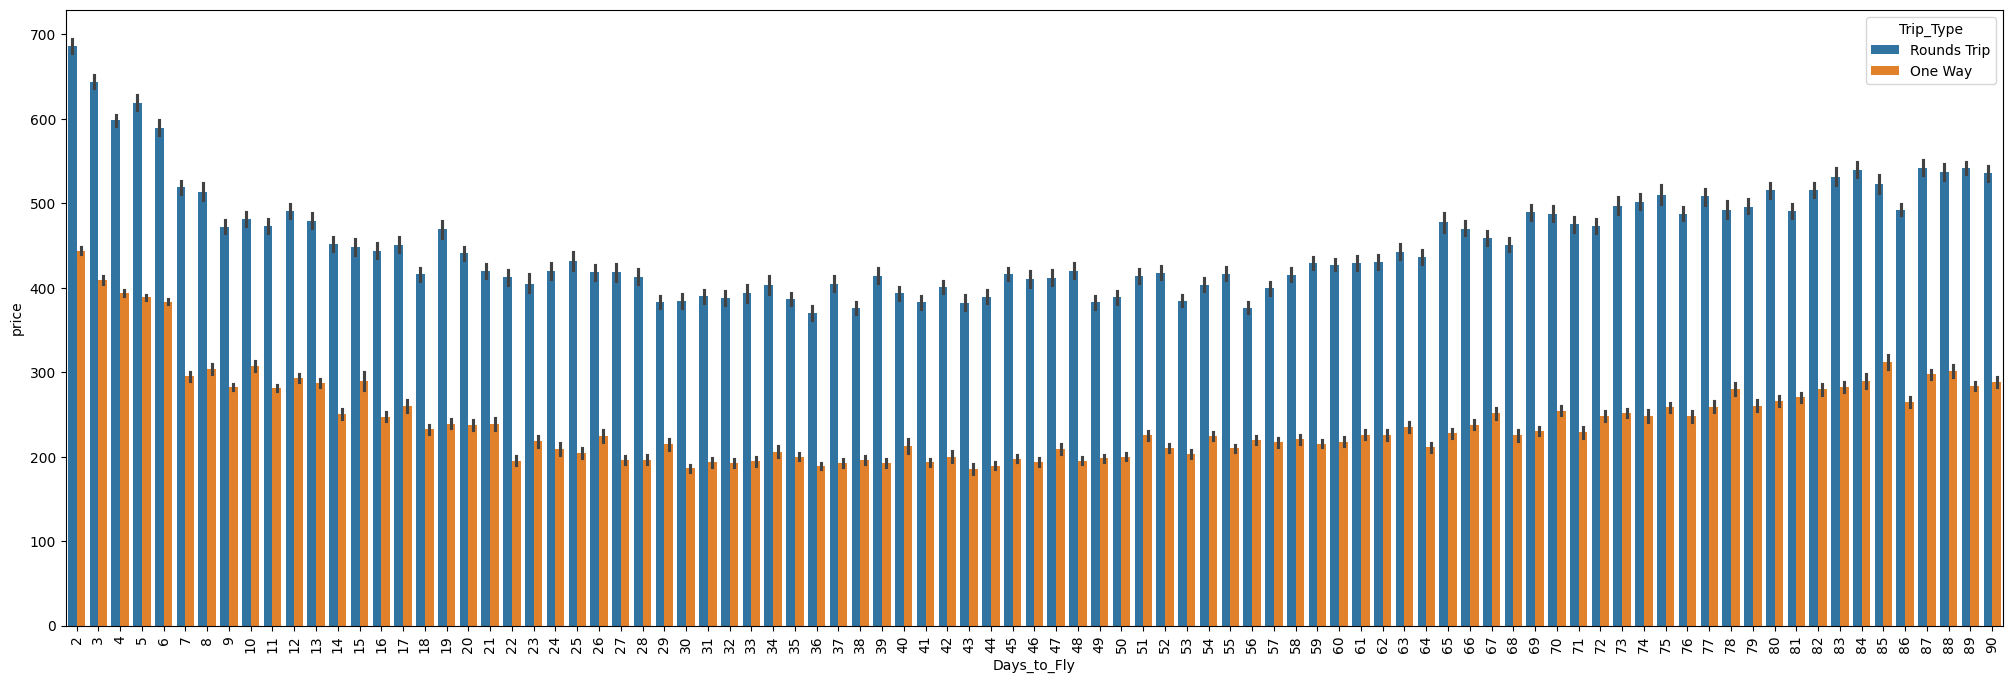

In [279]:
plt.figure(figsize=(25, 8))
ax = sns.barplot(x=df['Days_to_Fly'], y=df['price'], hue=df['Trip_Type'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.savefig(r'C:\Users\anshu\Desktop\MLOps\Flight-MLOps-Project\Flight-MLOps-Project\src\visualization\analytics_plots\days_to_fly_vs_price.png', bbox_inches='tight')
plt.show()

# Average price by carrier by Route

C:\Users\anshu\AppData\Local\Temp\ipykernel_23912\1084766842.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\anshu\AppData\Local\Temp\ipykernel_23912\1084766842.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bx.set_xticklabels(bx.get_xticklabels(), rotation=90)


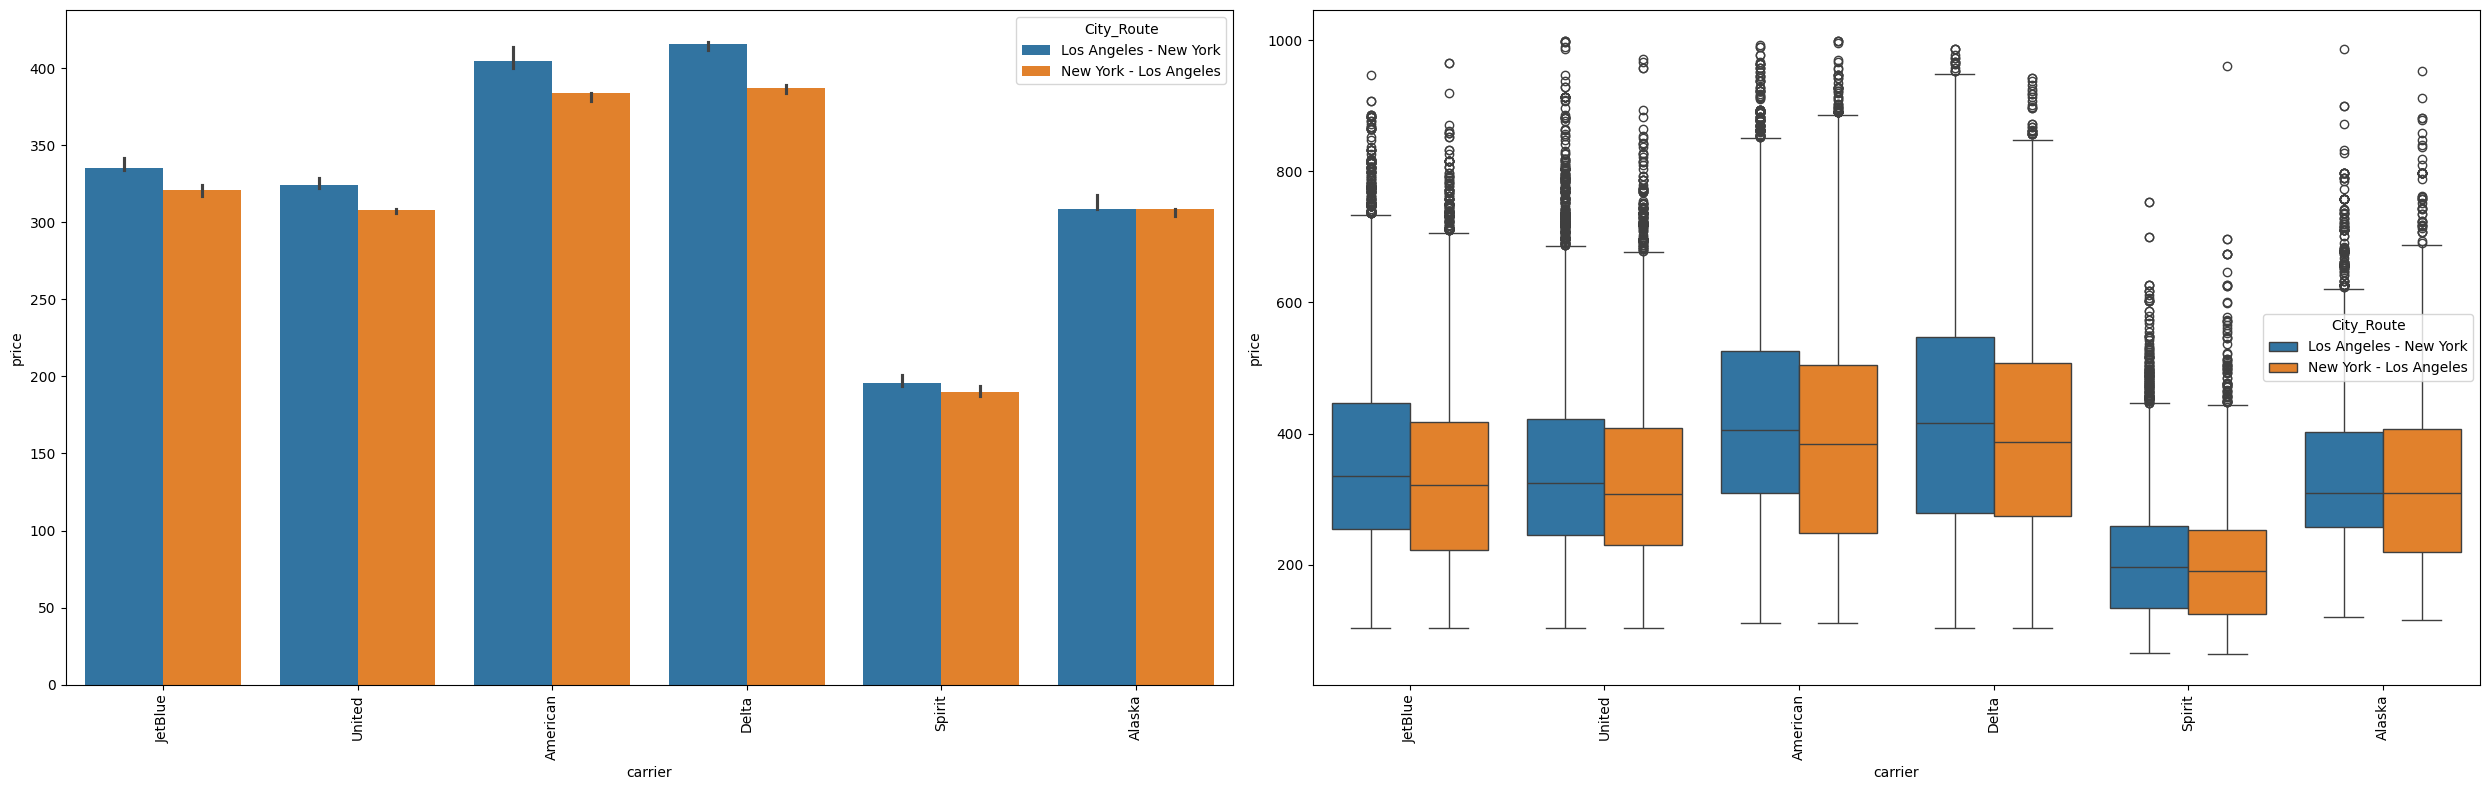

In [280]:
plt.figure(figsize=(25, 8))

plt.subplot(1,2,1)
carrier_counts = df['carrier'].value_counts()
ordered_carriers = carrier_counts.index

ax = sns.barplot(x=df['carrier'], y=df['price'], hue=df['City_Route'], order=ordered_carriers, estimator=np.median)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# plt.show()

plt.subplot(1,2,2)
bx = sns.boxplot(x=df['carrier'], y=df['price'], hue=df['City_Route'],order=ordered_carriers)
bx.set_xticklabels(bx.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.savefig(r'C:\Users\anshu\Desktop\MLOps\Flight-MLOps-Project\Flight-MLOps-Project\src\visualization\analytics_plots\price_by_carrier.png') 

# Price vs Round Trip Duration

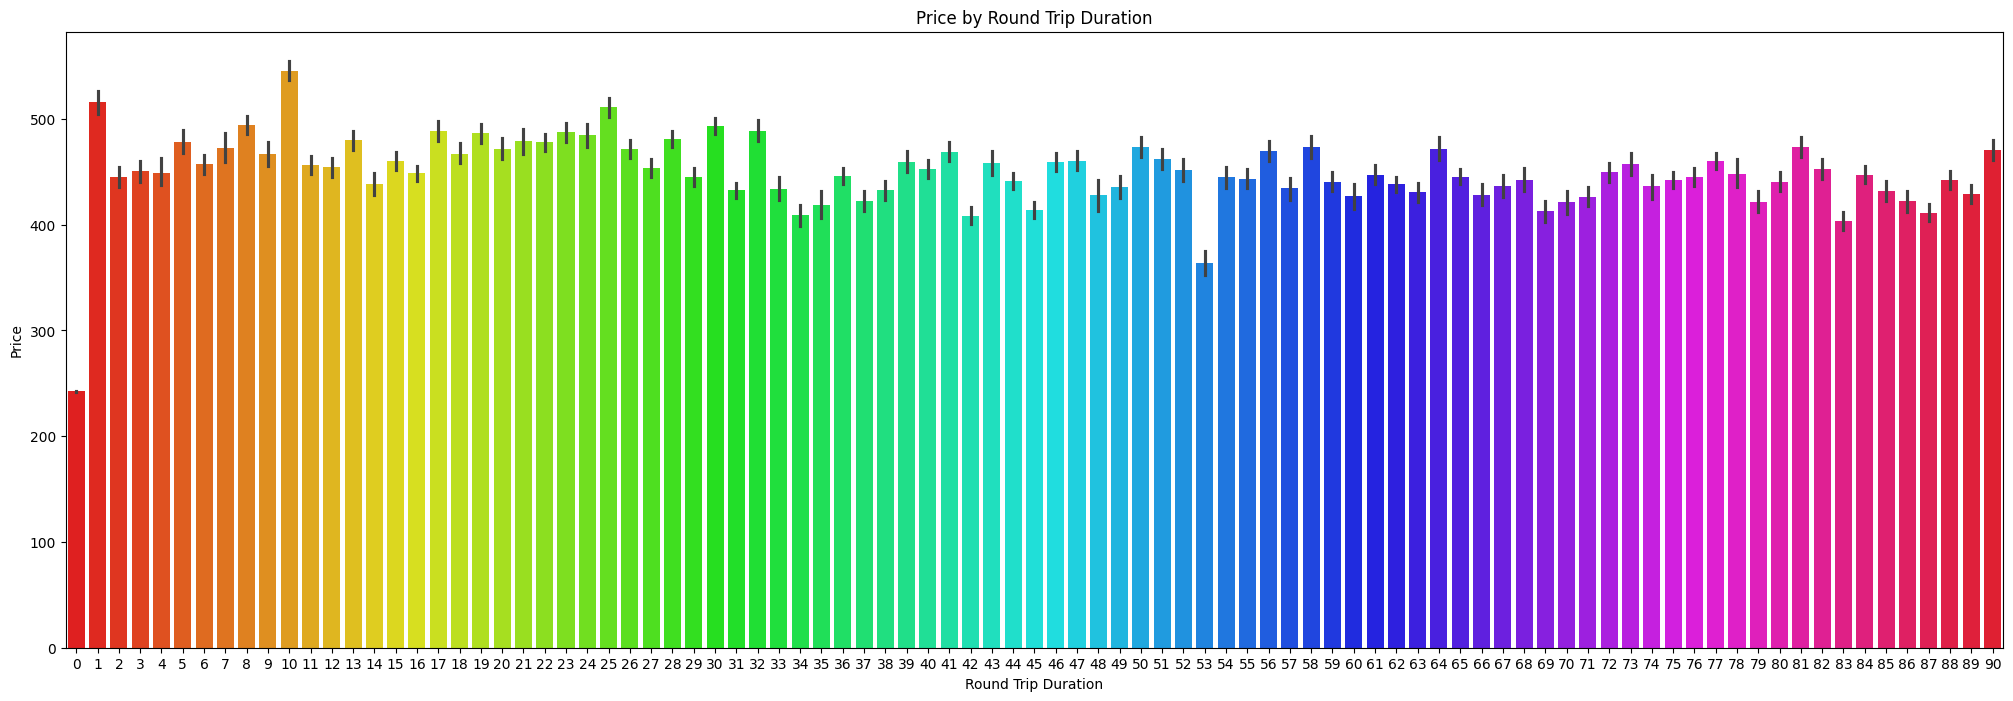

In [281]:
plt.figure(figsize=(25, 8))
sns.barplot(x='round_trip_duration', y='price', hue='round_trip_duration', palette='hsv', data=df)

plt.title('Price by Round Trip Duration')
plt.xlabel('Round Trip Duration')
plt.ylabel('Price')
plt.legend([], frameon=False)
plt.savefig(r'C:\Users\anshu\Desktop\MLOps\Flight-MLOps-Project\Flight-MLOps-Project\src\visualization\analytics_plots\price_by_round_trip_duration.png') 
plt.show()

In [28]:
raw_df = pd.read_csv(r'C:\Users\anshu\Desktop\MLOps\Flight-MLOps-Project\Flight-MLOps-Project\data\interim\merged_raw_data.csv')
raw_df.head()

,Unnamed: 0,Report_Run_Time,carrier,from_loc,to_loc,stop,price,from_timestamp,to_timestamp,from_date,to_date,carbon_emission,overhead_bin,layover,details,round_trip_duration
0,0,2024-03-10,Spirit,EWR,LAX,Nonstop,211.0,6:47 AM,10:15 AM,Mar 28,Mar 28,Carbon emissions estimate: 293 kilograms. -18%...,This price for this flight doesn't include ove...,NaN,From 211 US dollars round trip total.This pric...,89
1,1,2024-03-10,Alaska,EWR,LAX,Nonstop,297.0,7:30 AM,10:48 AM,Mar 28,Mar 28,Carbon emissions estimate: 272 kilograms. -24%...,$297,NaN,From 297 US dollars round trip total. Nonstop ...,89
2,2,2024-03-10,JetBlue,EWR,LAX,Nonstop,298.0,5:15 AM,8:30 AM,Mar 28,Mar 28,Carbon emissions estimate: 422 kilograms. +18%...,This price for this flight doesn't include ove...,NaN,From 298 US dollars round trip total.This pric...,89
3,3,2024-03-10,United,EWR,LAX,Nonstop,302.0,12:00 PM,3:24 PM,Mar 28,Mar 28,Carbon emissions estimate: 427 kilograms. +19%...,This price for this flight doesn't include ove...,NaN,From 302 US dollars round trip total.This pric...,89
4,4,2024-03-10,Spirit,LGA,LAX,1 stop,269.0,4:29 PM,5:00 PM,Mar 28,Mar 28,Carbon emissions estimate: 338 kilograms. -6% ...,$269,Layover (1 of 1) is a 19 hr 30 min overnight l...,From 269 US dollars round trip total. 1 stop f...,89


In [33]:
raw_df.loc[raw_df['overhead_bin'].str.contains("doesn't include overhead bin access"), 'overhead_bin'] = 'Additional charge for overhead bin'
raw_df.loc[raw_df['overhead_bin'].str.startswith("$"), 'overhead_bin'] = 'No additional charge for overhead bin'

In [40]:
overhead_bin_df = raw_df.groupby(['carrier','overhead_bin']).count().reset_index()[['carrier','overhead_bin','Report_Run_Time']]
overhead_bin_df

,carrier,overhead_bin,Report_Run_Time
0,Alaska,No additional charge for overhead bin,8258
1,American,No additional charge for overhead bin,26833
2,Delta,No additional charge for overhead bin,25565
3,Frontier,Additional charge for overhead bin,1390
4,JetBlue,Additional charge for overhead bin,36159
5,JetBlue,No additional charge for overhead bin,8
6,Separate tickets booked togetherThis trip incl...,Additional charge for overhead bin,341
7,Separate tickets booked togetherThis trip incl...,Additional charge for overhead bin,74
8,Separate tickets booked togetherThis trip incl...,Additional charge for overhead bin,3687
9,Southwest,Price unavailable,5


In [42]:
overhead_bin_df = overhead_bin_df[overhead_bin_df['carrier'].isin(df.carrier.unique())]
overhead_bin_df

,carrier,overhead_bin,Report_Run_Time
0,Alaska,No additional charge for overhead bin,8258
1,American,No additional charge for overhead bin,26833
2,Delta,No additional charge for overhead bin,25565
4,JetBlue,Additional charge for overhead bin,36159
5,JetBlue,No additional charge for overhead bin,8
10,Spirit,Additional charge for overhead bin,7068
11,Spirit,No additional charge for overhead bin,2504
13,United,Additional charge for overhead bin,26402
14,United,No additional charge for overhead bin,1973


In [66]:
max_report_run_time_idx = overhead_bin_df.groupby('carrier')['Report_Run_Time'].idxmax()
max_report_run_time_df = overhead_bin_df.loc[max_report_run_time_idx]
max_report_run_time_df = max_report_run_time_df.reset_index()
max_report_run_time_df[['carrier','overhead_bin']]

,carrier,overhead_bin
0,Alaska,No additional charge for overhead bin
1,American,No additional charge for overhead bin
2,Delta,No additional charge for overhead bin
3,JetBlue,Additional charge for overhead bin
4,Spirit,Additional charge for overhead bin
5,United,Additional charge for overhead bin


In [67]:
max_report_run_time_df[['carrier','overhead_bin']].to_csv(r'C:\Users\anshu\Desktop\MLOps\Flight-MLOps-Project\Flight-MLOps-Project\src\visualization\analytics_plots\carrier_overhead_bin.csv')

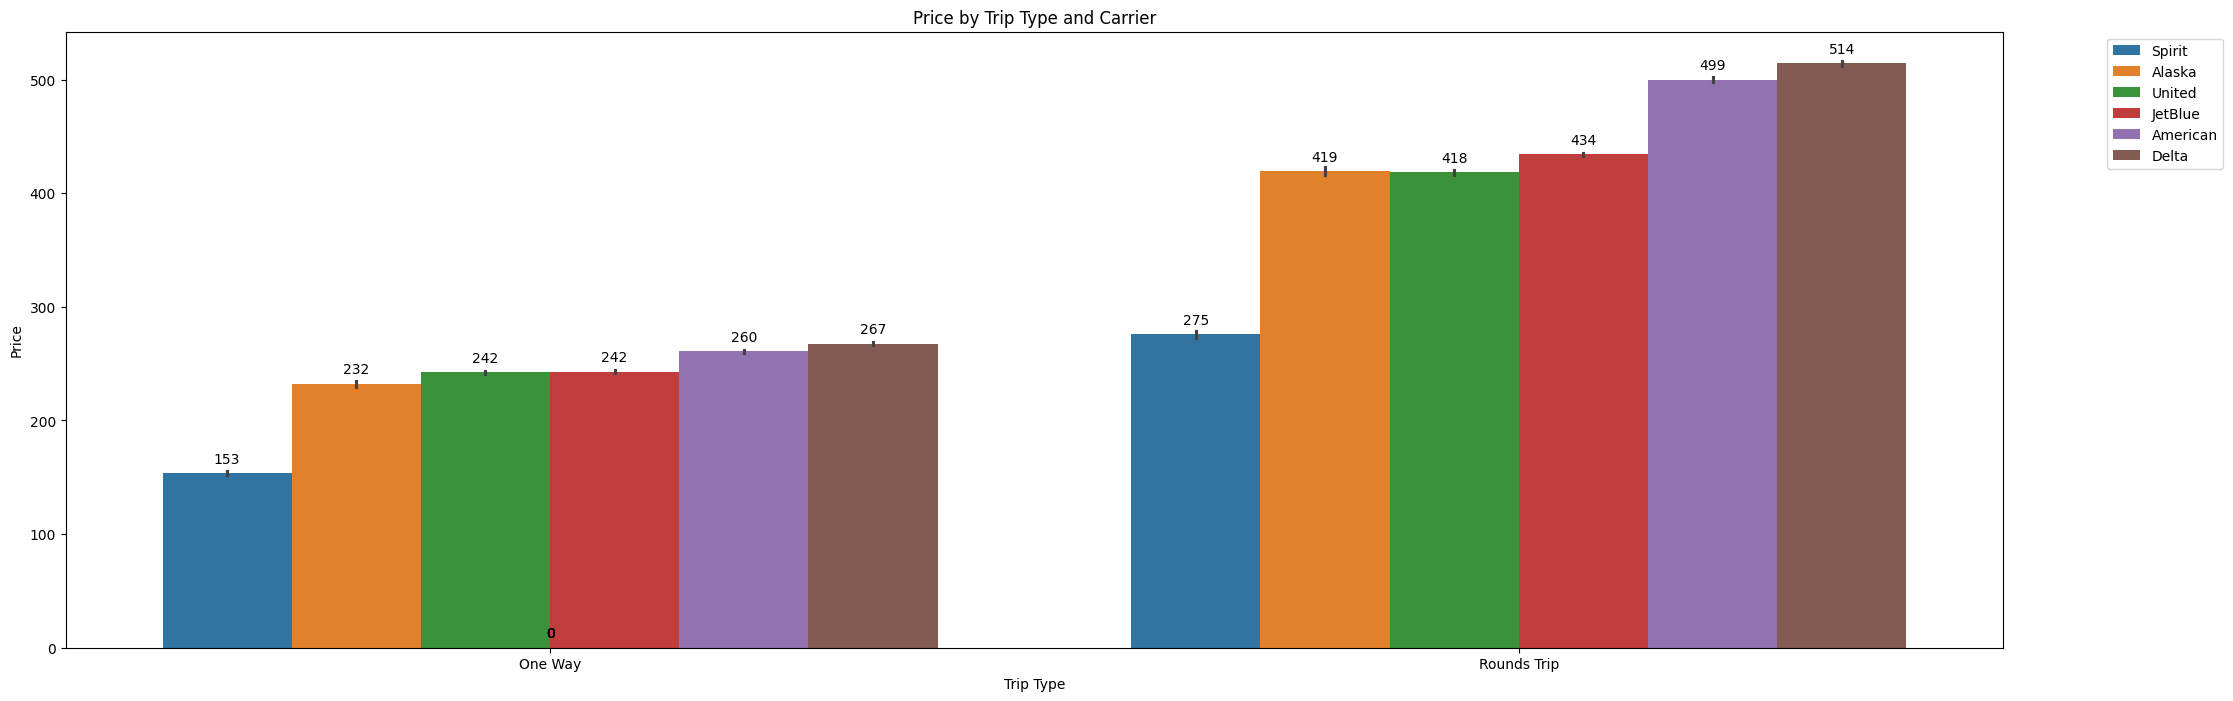

In [70]:
# Calculate average price per carrier
plt.figure(figsize=(25, 8))
avg_price_per_carrier = df.groupby('carrier')['price'].mean().sort_values()

# Sort dataframe by carrier average price
df_sorted = df.set_index('carrier').loc[avg_price_per_carrier.index].reset_index()

ax = sns.barplot(x='Trip_Type', y='price', hue='carrier', data=df_sorted)

# Add data labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', 
                xytext=(0, 5), 
                textcoords='offset points',
                fontsize=10, color='black')

plt.title('Price by Trip Type and Carrier')
plt.xlabel('Trip Type')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() 
plt.savefig(r'C:\Users\anshu\Desktop\MLOps\Flight-MLOps-Project\Flight-MLOps-Project\src\visualization\analytics_plots\price_by_trip_type.png') 
plt.show()

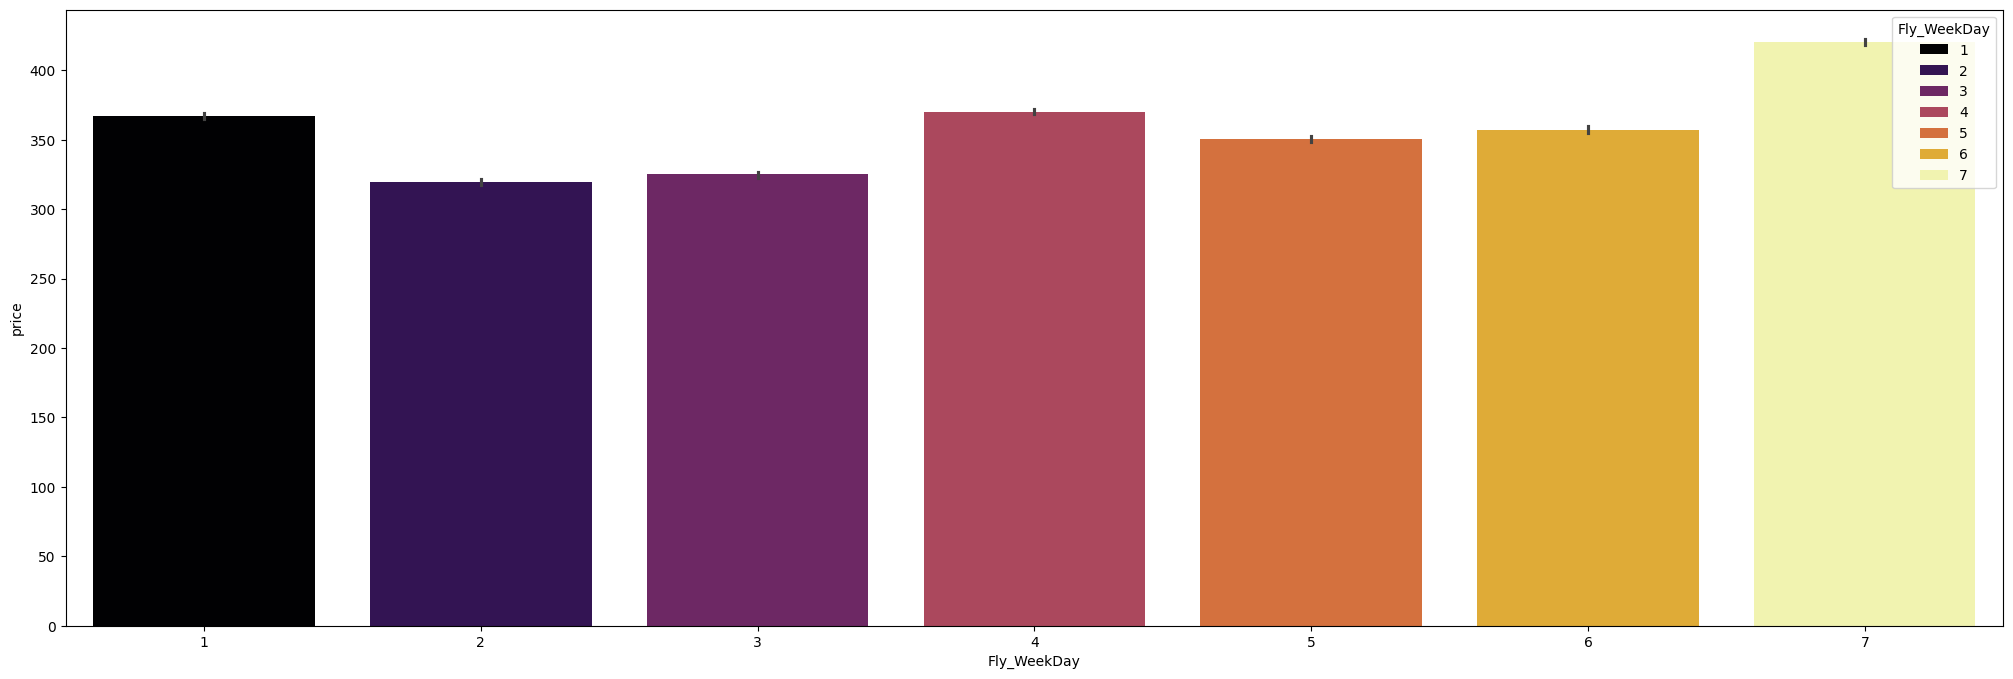

In [293]:
plt.figure(figsize=(25, 8))
sns.barplot(x='Fly_WeekDay', y='price', hue='Fly_WeekDay', data=df, palette='inferno')
plt.savefig(r'C:\Users\anshu\Desktop\MLOps\Flight-MLOps-Project\Flight-MLOps-Project\src\visualization\analytics_plots\price_by_weekday.png')